<a href="https://colab.research.google.com/github/alfian217050/sna-with-python/blob/main/Karate_Zachary_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [ ]:
# Import Data
G = nx.karate_club_graph()

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


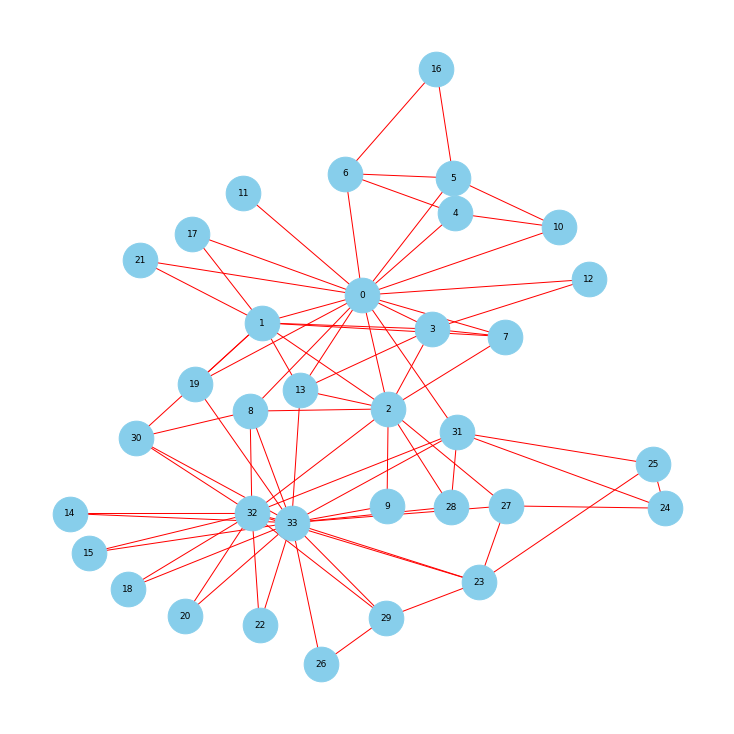

In [ ]:
from matplotlib.patches import ArrowStyle
# Menampilkan Data
print('Nodes: ', nx.nodes(G))
print('Edges: ', nx.edges(G))

# Memvisualisasikan Jaringan
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True,
        node_color='skyblue', node_size=1200,
        arrowstyle='->', arrowsize=20, edge_color='red',
        font_size=9,
        pos=nx.kamada_kawai_layout(G))

In [ ]:
# Mengukur Degree Centrality
# nx.degree_centrality(G)

# Urutkan dari Nilai Tertinggi
sorted(nx.degree(G), key=lambda x: x[1], reverse=True)[0:10]

# Mengukur Betweenness Centrality
# nx.betweenness_centrality(G)

# Urutkan dari Nilai Tertinggi
sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)[0:10]

# Mengukur Closeness Centrality
# nx.closeness_centrality(G)

# Urutkan dari Nilai Tertinggi
sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)[0:10]

# Mengukur Eigenvector Centrality
# nx.eigenvector_centrality(G)

# Urutkan dari Nilai Tertinggi
sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)[0:10]

[(33, 0.373371213013235),
 (0, 0.3554834941851943),
 (2, 0.31718938996844476),
 (32, 0.3086510477336959),
 (1, 0.2659538704545025),
 (8, 0.2274050914716605),
 (13, 0.22646969838808148),
 (3, 0.2111740783205706),
 (31, 0.19103626979791702),
 (30, 0.17476027834493085)]

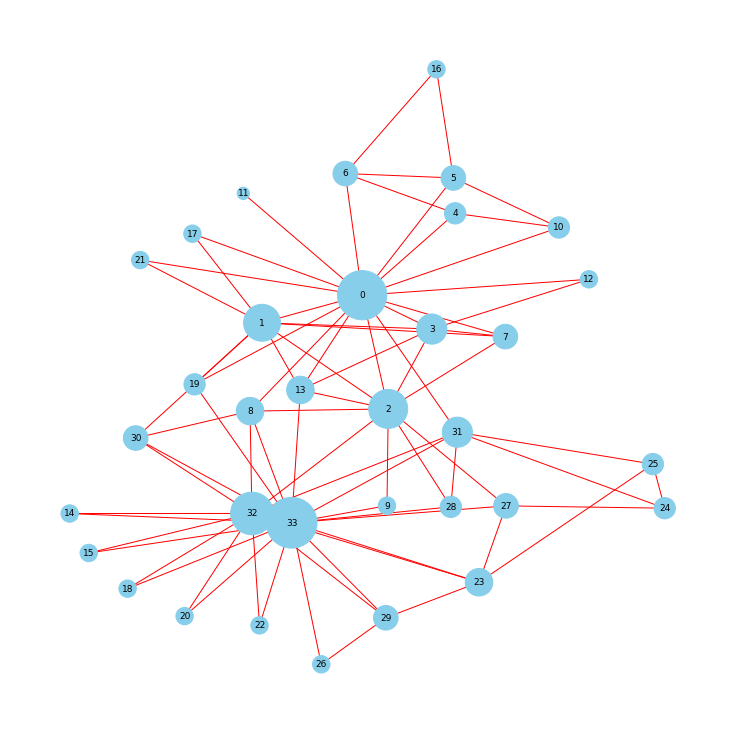

In [ ]:
# Menetapkan Dictionary Nilai Degree
d = dict(nx.degree_centrality(G))

# Memvisualisasikan Jaringan
plt.figure(figsize=(10,10))

nx.draw(G, with_labels=True,
        node_color='skyblue', nodelist=d.keys(),
        node_size=[v * 5000 for v in d.values()],
        arrowstyle='->', arrowsize=20, edge_color='red',
        font_size=9,
        pos=nx.kamada_kawai_layout(G))

In [ ]:
# Menampilkan Jumlah Nodes
print('Jumlah Nodes: ', nx.number_of_nodes(G))

# Menampilkan Jumlah Edges
print('Jumlah Edges: ', nx.number_of_edges(G))

# Menampilkan Diameter Jaringan
print('Diameter Jaringan: ', nx.diameter(G))

# Menampilkan Average Shortest Path
print('Average Shortest Path: ', nx.average_shortest_path_length(G))

# Menampilkan Density
print('Density: ', nx.density(G))

# Menampilkan Jumlah Connected Component
print('Jumlah Connected Component: ', nx.number_connected_components(G))

Jumlah Nodes:  34
Jumlah Edges:  78
Diameter Jaringan:  5
Average Shortest Path:  2.408199643493761
Density:  0.13903743315508021
Jumlah Connected Component:  1


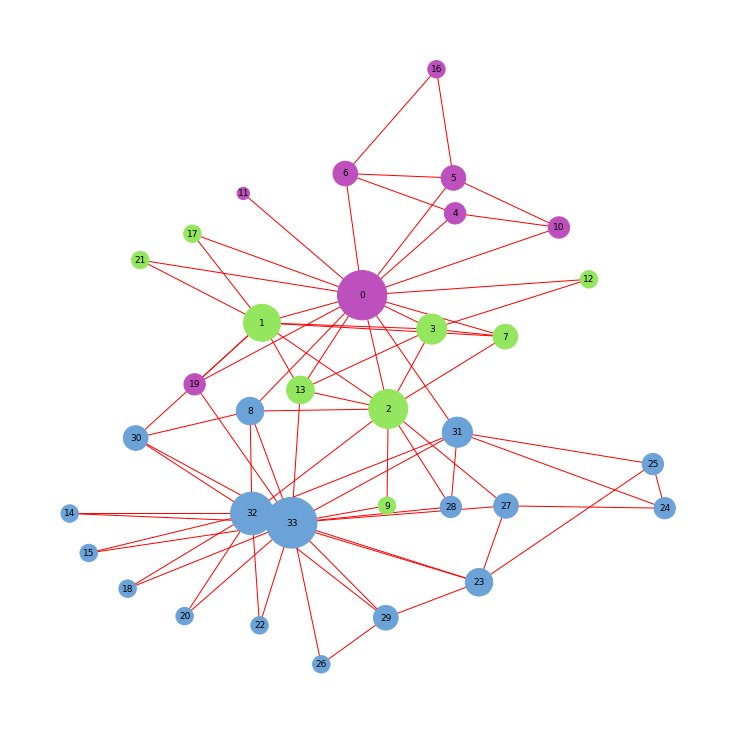

In [ ]:
# Import Modul 
from networkx.algorithms.community import greedy_modularity_communities

# Deteksi Komunitas menggunakan Modularity
communities = sorted(greedy_modularity_communities(G), key=len, reverse=True)
communities

# Membuat Fungsi Komunitas
def set_node_community(G, communities):
  "'Add community to node attributes'"
  for c, v_c in enumerate(communities):
    for v in v_c:
      # Add 1 to save 0 for external edges
      G.nodes[v]['community'] = c + 1

# Membuat Fungsi Warna
def get_color(i, r_off=1, g_off=1, b_off=1):
  "'Assign a color to an edge'"
  ro,g0,b0 = 0, 0, 0
  n = 16
  low, high = 0.1, 0.9
  span = high - low

  r = low + span * (((i + r_off) * 3) % n)/(n - 1)
  g = low + span * (((i + g_off) * 5) % n)/(n - 1)
  b = low + span * (((i + b_off) * 7) % n)/(n - 1)

  return (r, g, b)

# Menetapkan Komunitas untuk setiap Node
community = set_node_community(G, communities)

# Menetapkan Warna Node
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Menetapkan Dictionary Nilai Degree
d = dict(nx.degree_centrality(G))

# Memvisualisasikan Jaringan
plt.figure(figsize=(10,10))

nx.draw(G, with_labels=True,
        node_color = node_color,
        node_size=[v * 5000 for v in d.values()],
        arrowstyle='->', arrowsize=20, edge_color='r',
        font_size=9, cmap = plt.get_cmap('jet'),
        pos=nx.kamada_kawai_layout(G))